# 비행기 악보

In [2]:
'''원본
a12 g16 f8 g8 a8 a8 a4 g8 g8 g4 a8 a8 a4
a12 g16 f8 g8 a8 a8 a4 g8 g8 a12 g16 f2
'''

'원본\na12 g16 f8 g8 a8 a8 a4 g8 g8 g4 a8 a8 a4\na12 g16 f8 g8 a8 a8 a4 g8 g8 a12 g16 f2\n'

Using TensorFlow backend.


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
 - 0s - loss: 5.4489e-04 - accuracy: 1.0000
epochs : 334
Epoch 1/1
 - 0s - loss: 5.3789e-04 - accuracy: 1.0000
epochs : 335
Epoch 1/1
 - 0s - loss: 5.3097e-04 - accuracy: 1.0000
epochs : 336
Epoch 1/1
 - 0s - loss: 5.2418e-04 - accuracy: 1.0000
epochs : 337
Epoch 1/1
 - 0s - loss: 5.1750e-04 - accuracy: 1.0000
epochs : 338
Epoch 1/1
 - 0s - loss: 5.1092e-04 - accuracy: 1.0000
epochs : 339
Epoch 1/1
 - 0s - loss: 5.0438e-04 - accuracy: 1.0000
epochs : 340
Epoch 1/1
 - 0s - loss: 4.9797e-04 - accuracy: 1.0000
epochs : 341
Epoch 1/1
 - 0s - loss: 4.9165e-04 - accuracy: 1.0000
epochs : 342
Epoch 1/1
 - 0s - loss: 4.8543e-04 - accuracy: 1.0000
epochs : 343
Epoch 1/1
 - 0s - loss: 4.7926e-04 - accuracy: 1.0000
epochs : 344
Epoch 1/1
 - 0s - loss: 4.7323e-04 - accuracy: 1.0000
epochs : 345
Epoch 1/1
 - 0s - loss: 4.6726e-04 - accuracy: 1.0000
epochs : 346
Epoch 1/1
 - 0s - loss: 4.6138e-04 - accuracy: 1.0000
epochs : 347
Epoch 1/1
 - 0s - loss: 4.5556e-04 -

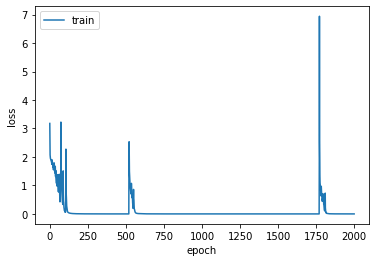

21/21 [==============================] - 0s 3ms/step
accuracy: 100.00%


In [3]:
'''비행기 상태유지 LSTM 모델 전체 코드'''
# 0. 사용할 패키지 불러오기
import keras
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.utils import np_utils

# 랜덤시드 고정시키기
np.random.seed(5)

# 손실 이력 클래스 정의
class LossHistory(keras.callbacks.Callback):
    def init(self): # init를 생성자로 만들고 싶다면 __init__ 로 만들어야 한다.
        self.losses = [] 

    def on_epoch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))

# 데이터셋 생성 함수
def seq2dataset(seq, window_size):
    dataset = []
    for i in range(len(seq)-window_size):
        subset = seq[i:(i+window_size+1)]
        dataset.append([code2idx[item] for item in subset])
    return np.array(dataset)        

# 1. 데이터 준비하기

# 코드 사전 정의

code2idx = {'f2':28,'c4':0, 'd4':1, 'e4':2, 'f4':3, 'g4':4, 'a4':5, 'b4':6,
            'c8':7, 'd8':8, 'e8':9, 'f8':10, 'g8':11, 'a8':12, 'b8':13,
            'c12':14, 'd12':15, 'e12':16, 'f12':17, 'g12':18, 'a12':19, 'b12':20,
            'c16':21, 'd16':22, 'e16':23, 'f16':24, 'g16':25, 'a16':26, 'b16':27}

idx2code = {0:'c4', 1:'d4', 2:'e4', 3:'f4', 4:'g4', 5:'a4', 6:'b4',
            7:'c8', 8:'d8', 9:'e8', 10:'f8', 11:'g8', 12:'a8', 13:'b8',
            14:'c12', 15:'d12', 16:'e12', 17:'f12', 18:'g12', 19:'a12', 20:'b12',
            21:'c16', 22:'d16', 23:'e16', 24:'f16', 25:'g16', 26:'a16', 27:'b16',28:'f2'}

# 시퀀스 데이터 정의

seq = ['a12', 'g16', 'f8', 'g8', 'a8', 'a8', 'a4', 'g8', 'g8', 'g4', 'a8', 'a8', 'a4',
      'a12', 'g16', 'f8', 'g8', 'a8', 'a8', 'a4', 'g8', 'g8', 'a12', 'g16', 'f2']

# 2. 데이터셋 생성하기

dataset = seq2dataset(seq, window_size = 4)

print(dataset.shape) # (21, 5)

# 입력(X)과 출력(Y) 변수로 분리하기
x_train = dataset[:,0:4]
y_train = dataset[:,4]

max_idx_value = 13

# 입력값 정규화 시키기
x_train = x_train / float(max_idx_value)

# 입력을 (샘플 수, 타임스텝, 특성 수)로 형태 변환
x_train = np.reshape(x_train, (21, 4, 1))

# 라벨값에 대한 one-hot 인코딩 수행
y_train = np_utils.to_categorical(y_train)

one_hot_vec_size = y_train.shape[1]

print("one hot encoding vector size is ", one_hot_vec_size) # 29

# 3. 모델 구성하기
model = Sequential()
model.add(LSTM(128, batch_input_shape = (1, 4, 1), stateful=True)) # 아까와 다른부분(상태 유지, 배치사이즈 별도로 정하기)
model.add(Dense(one_hot_vec_size, activation='softmax')) 

# 4. 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 5. 모델 학습시키기
num_epochs = 2000

history = LossHistory() # 손실 이력 객체 생성

history.init() # 히스토리를 초기화시켜준다.

for epoch_idx in range(num_epochs):
    print ('epochs : ' + str(epoch_idx) )
    model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2, shuffle=False, callbacks=[history]) # 50 is X.shape[0]
    model.reset_states()



# 6. 학습과정 살펴보기
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(history.losses)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

# 7. 모델 평가하기
scores = model.evaluate(x_train, y_train, batch_size=1)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))
model.reset_states()#상태 초기화

# 8. 모델 사용하기

pred_count = 21 # 최대 예측 개수 정의

# 한 스텝 예측

seq_out = ['a12', 'g16', 'f8', 'g8']
pred_out = model.predict(x_train, batch_size=1)

for i in range(pred_count):
    idx = np.argmax(pred_out[i]) # one-hot 인코딩을 인덱스 값으로 변환
    seq_out.append(idx2code[idx]) # seq_out는 최종 악보이므로 인덱스 값을 코드로 변환하여 저장

model.reset_states() #상태 초기화


In [4]:
print("one step prediction : ", seq_out)

# 곡 전체 예측

seq_in = ['a12', 'g16', 'f8', 'g8']
seq_out = seq_in
seq_in = [code2idx[it] / float(max_idx_value) for it in seq_in] # 코드를 인덱스값으로 변환

for i in range(pred_count):
    sample_in = np.array(seq_in)
    sample_in = np.reshape(sample_in, (1, 4, 1)) # 샘플 수, 타입스텝 수, 속성 수
    pred_out = model.predict(sample_in)
    idx = np.argmax(pred_out)
    seq_out.append(idx2code[idx])
    seq_in.append(idx / float(max_idx_value))
    seq_in.pop(0)

model.reset_states()#상태 초기화

print("full song prediction : ", seq_out)

'''
a12 g16 f8 g8 a8 a8 a4 g8 g8 g4 a8 a8 a4
a12 g16 f8 g8 a8 a8 a4 g8 g8 a12 g16 f2
'''

one step prediction :  ['a12', 'g16', 'f8', 'g8', 'a8', 'a8', 'a4', 'g8', 'g8', 'g4', 'a8', 'a8', 'a4', 'a12', 'g16', 'f8', 'g8', 'a8', 'a8', 'a4', 'g8', 'g8', 'a12', 'g16', 'f2']
full song prediction :  ['a12', 'g16', 'f8', 'g8', 'a8', 'a8', 'a4', 'g8', 'g8', 'g4', 'a8', 'a8', 'a4', 'a12', 'g16', 'f8', 'g8', 'a8', 'a8', 'a4', 'g8', 'g8', 'a12', 'g16', 'f2']


'\na12 g16 f8 g8 a8 a8 a4 g8 g8 g4 a8 a8 a4\na12 g16 f8 g8 a8 a8 a4 g8 g8 a12 g16 f2\n'